<a href="https://colab.research.google.com/github/zwadhams/DataMiningStuff/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSCI 347 Project 2. Zach Wadhams & Kruize Christensen. Dataset Used: 
https://snap.stanford.edu/data/ego-Facebook.html

#Project 02: Exploring Graph Data

Run all the analysis in this project on the largest connected component of the graph. Note
that many of these datasets are quite large. If analyzing the data its taking too long, you may
pre-process it by taking a sample of the graph first, and then extracting the largest connected
component, to get the graph down to a manageable size.

##Problem 1: Think about the data
In a well-written paragraph, answer the following questions:


*   (3 points) Why are you interested in this data set?
*   (3 points) Clearly state if/how the data was pre-processed (Was the largest connected component extracted? Was a sample of vertices or edges taken? If so, describe the sampling
process that was used.)
*   (4 points) Before doing any analysis, answer the question. What characteristics do you expect
the vertices with high centrality values to have and why? Specifically, think about non-graph
characteristics. For example, in a graph where nodes represent cities and edges are roads
between them, we might expect highly central cities to have high populations or to house
major industries.






We are particularly interested in this data because of the massive social network that Facebook contains. A user's friend network may connect them directly or indirectly to many thousands of people. From even a relatively small sample of around 4000 users, which is how many this dataset contains, the scope of Facebook's potential connections is revealed. This data was only processed by way of anonymization. When the data was collected, any personably identifiable information was replaced by placeholder values. Essentially this is raw data that only has the users names or ID's removed. We did not alter this data set at all. We would expect those users with the highest number of friends to have the highest centrality values. This would be because with more friends comes more 'friends of friends' which would increase the centrality of that user. Essentially the more people you know, the more people you know. 



##Problem 2: Write Python code for graph analysis
Write the following functions in Python. You may assume that the input graph is unweighted,
undirected, and simple – has no parallel edges and no loops. Functions provided by networkx can
be used within your code, as long as the function does not perform the same task as what you
are being asked to implement. For example, you cannot use networkx’s betweenness centrality
function within your own betweenness centrality function, but you can use networkx’s functions for
finding shortest paths. You may also assume that vertices are represented as integers (so the pair
(1,3) indicates that there is an edge between vertex 1 and 3, for example).

###Graph read-in

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import random
def readGraphIntoArray(filename):
    array = np.loadtxt(filename, dtype=int)
    print(array)
    return array

def getGraph(array):
    G = nx.Graph()
    G.add_edges_from(array)
    #nx.draw(G)  # networkx draw()
    #plt.draw()  # pyplot draw()
    return G

graphArray = readGraphIntoArray('facebook_combined.txt.gz')
circles = getGraph(graphArray)
typeList = graphArray.tolist()
t = tuple(map(tuple, graphArray))
print(type(graphArray))


[[   0    1]
 [   0    2]
 [   0    3]
 ...
 [4027 4032]
 [4027 4038]
 [4031 4038]]
<class 'numpy.ndarray'>


###1. (5 points) Number of vertices: A function that takes the following input: a list of edges representing a graph, where each edge is a pair. The output should be the number of vertices.


In [ ]:
##COMPLETE
def getNumVertices(edgesArray):
    number = edgesArray[-1, 1] + 1
    return number


###2. (5 points) Degree of a vertex: A function that takes the following input: a list of edges representing a graph, where each edge is a pair, and a vertex index that is an integer. The output should be the degree of the input vertex.

In [ ]:
#COMPLETE
def getVertexDegree(edgesArray, vertexIndex):
    inDegree = 0
    for i in edgesArray:
      if vertexIndex in i:
        inDegree += 1

    return inDegree


###3. (5 points) Clustering coefficient of a vertex: A function that takes the following input: a list of edges representing a graph, where each edge is a pair, and a vertex index that is an integer. The output should be the clustering coefficient of the input vertex.

In [ ]:
##COMPLETE
def getClusteringCoefficient(edgesArray, vertexIndex):
  pairs = []
  for edgeArray1, edgeArray2 in edgesArray:
    if vertexIndex == edgeArray1:
      pairs.append(edgeArray2)
    if vertexIndex == edgeArray2:
      pairs.append(edgeArray1)
  if len(pairs) < 2:
    return 0
  else:
    numEdges = 0
    for edge in edgesArray:
      if (edge[0] in pairs) and (edge[1] in pairs):
        numEdges += 1
    totalEdges = math.comb(len(pairs),2)
    result = numEdges/totalEdges
    return result


###4. (5 points) Betweenness centrality of a vertex: A function that takes the following input: a list of edges representing a graph, where each edge is a pair, and a vertex index that is an integer. The output should be the betweenness centrality of the input vertex.

In [ ]:
 ##COMPLETE
def getBetweennessCentrality(edgesArray, vertexIndex):
  G = getGraph(edgesArray)
  largest = max(nx.connected_components(G))
  edges = G.subgraph(largest).edges()
  sample = nx.Graph()
  
  for edge in edges:
    sample.add_edge(int(edge[0]), int(edge[1]))
  verts = sample.nodes()
  betweeness = 0

  for vert1 in verts:
    for vert2 in verts:
      if (vert1 != vertexIndex) and (vert2 != vertexIndex) and (vert2 > vert1):
        swap = 0
        swapPoint = 0
        for j in nx.all_shortest_paths(sample, source = vert1, target = vert2):
          swap += 1
          if vertexIndex in j:
            swapPoint += 1
        betweeness += swapPoint / swap

  return betweeness

###5. (5 points) Adjacency matrix. A function that takes the following input: a list of edges representing a graph, where each edge is a pair. The output should be the dense adjacency matrix of the graph.

In [ ]:
##COMPLETE
from collections import defaultdict
def createAdjacencyMatrix(edgesArray):
    adjMatrix = defaultdict(set)
    for x, y in edgesArray:
        adjMatrix[x].add(y)
        adjMatrix[y].add(x) 
    return adjMatrix


Our dataset is too long to effictively display the adjacency matrix in google collab but we have checked and verified that this matrix is correct using networkx.

###6. (10 points) Prestige centrality of vertices: A function that takes the following input: a dense adjacency matrix representation of a graph. The output should be the prestige values for each vertex in the graph. (Note, you may NOT use linear algebra functions in numpy, spicy, or any other library to find eigenvectors but you MAY use linear algebra functions for transpose, matrix-vector multiplication, computing the dot product, the norm, and argmax.)


In [ ]:
adjMatrixfor6 = nx.adjacency_matrix(circles)

def getPrestigeCentrality(adjMatrix):
    allPrestige = np.empty(4039)
    for row in adjMatrix:
      allPrestige = np.concatenate(allPrestige,1,axis=0)
    for row in adjMatrix:
      allPrestige = (adjMatrix * allPrestige)
      i = reciprocal(argmax(allPrestige))
      allPrestige = allPrestige * i
    return allPrestige


##Problem 3: Analyze the graph data
Using tables or figures as appropriate, report the following. You may treat the graph as a simple
undirected, unweighted graph. You may use networkx functions in all of Part 3, but you are
encouraged to test out your functions from Part 2 on real-world data.

###1. (5 points) Produce a visualization of the graph (or graph sample that you used)

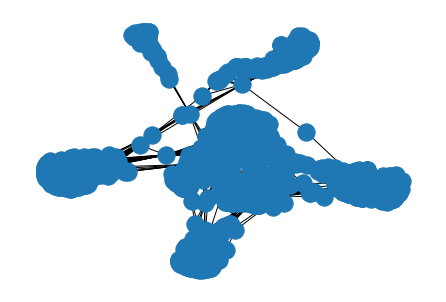

In [ ]:
nx.draw(circles)
plt.draw()

###2. (3 points) Find the 10 nodes with the highest degree.

In [ ]:
highestDegrees = sorted(circles.degree, key=lambda x: x[1], reverse=True)
print("10 highest degree nodes in format (node, degree)")
for i in range(10): 
  print(highestDegrees[i])


10 highest degree nodes in format (node, degree)
(107, 1045)
(1684, 792)
(1912, 755)
(3437, 547)
(0, 347)
(2543, 294)
(2347, 291)
(1888, 254)
(1800, 245)
(1663, 235)


###3. (3 points) Find the 10 nodes with the highest betweenness centrality

In [ ]:
from collections import Counter
##TAKES A WHILE TO RUN
highestBetCent = nx.betweenness_centrality(circles)
c = Counter(highestBetCent)
print("Top 10 nodes with highest betweeness centrality in format (node, betweenessCentrality)")
c.most_common(10)

Top 10 nodes with highest betweeness centrality in format (node, betweenessCentrality)


[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215),
 (58, 0.08436020590796486),
 (428, 0.06430906239323866)]

###4. (3 points) Find the 10 nodes with the highest clustering coefficient. If there are ties, choose 10 to report and explain how the 10 were chosen.


In [ ]:
highestClustCoef = nx.clustering(circles)
c = Counter(highestClustCoef)
print("Top 10 nodes with highest clustering coefficient in format (node, clusteringCoefficient)")
c.most_common(10)

Top 10 nodes with highest clustering coefficient in format (node, clusteringCoefficient)


[(32, 1.0),
 (33, 1.0),
 (35, 1.0),
 (42, 1.0),
 (44, 1.0),
 (46, 1.0),
 (47, 1.0),
 (52, 1.0),
 (63, 1.0),
 (70, 1.0)]

The top 10 were chosen based on the lowest node number.

###5. (3 points) Find the top 10 nodes as ranked by prestige centrality (eigenvector centrality in networkx).

In [ ]:
highestPrestigeCentrality = nx.eigenvector_centrality(circles)
c = Counter(highestPrestigeCentrality)
print("Top 10 nodes with highest prestige centrality in format (node, prestigeCentrality)")
c.most_common(10)

Top 10 nodes with highest prestige centrality in format (node, prestigeCentrality)


[(1912, 0.09540696149067629),
 (2266, 0.08698327767886553),
 (2206, 0.08605239270584343),
 (2233, 0.08517340912756598),
 (2464, 0.08427877475676092),
 (2142, 0.08419311897991796),
 (2218, 0.08415573568055032),
 (2078, 0.08413617041724979),
 (2123, 0.08367141238206226),
 (1993, 0.0835324284081597)]

###6. (3 points) Find the top 10 nodes as ranked by Pagerank.

In [ ]:
highestPagerank = nx.pagerank(circles)
c = Counter(highestPagerank)
print("Top 10 nodes with highest pagerank in format (node, pagerank)")
c.most_common(10)

Top 10 nodes with highest pagerank in format (node, pagerank)


[(3437, 0.0076145868447496),
 (107, 0.006936420955866117),
 (1684, 0.006367162138306824),
 (0, 0.006289602618466542),
 (1912, 0.003876971600884498),
 (348, 0.002348096972780577),
 (686, 0.002219359259800019),
 (3980, 0.0021703235790099928),
 (414, 0.001800299047070226),
 (698, 0.0013171153138368812)]

### 7. (3 points) Comment on the differences and similarities in questions Part 3 1-6. Are the highly ranked nodes mostly the same? Do you notice significant differences in the rankings? Why do you think this is the case?

Some metrics have nodes that are close together and some do not. For example, many of the nodes with the highest prestige centrality are relatively close together (ie; 2206,2123,2233). Also some are seemingly completely unrelated such as the pagerank of the nodes (ie; 3437, 107, 1684, 414). This is most likely the case because if you look at our graph in Part 3 1, you can see that there are many different clusters that are close together. Some of these are larger are arranged in different shapes and this causes the differences in the node metrics.  